In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('lyrics_166.csv')

df.head()

,file,artist,title,lyrics,mood,year
0,TRAACER128F4290F96.h5,The Dillinger Escape Plan,Setting Fire to Sleeping Giants,First off let me say you look so tired...\r\nR...,1,2004
1,TRAACNS128F14A2DF5.h5,Willie Bobo,Spanish Grease,Ain't no love\r\nAin't no love\r\nAin't no lov...,1,1997
2,TRAADQX128F422B4CF.h5,Casiotone For The Painfully Alone,Nashville Parthenon,If you ever make it back to Nashville\r\nRemem...,1,2006
3,TRAAEEH128E0795DFE.h5,Chris Rea,Driving Home For Christmas,"I'm driving home for Christmas\r\nOh, I can't ...",1,1986
4,TRAAGCZ128F93210FD.h5,Black Eyed Peas,Let's Get It Started,"Let's get it started, in here...\r\n\r\nAnd th...",1,2004


In [71]:
data_X = df['lyrics'].values
data_Y = df['mood'].values

### remove lyrics puncuation using proter stemmer

In [73]:
# Porter Stemmer

import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()
def porter_tokenizer(text, stemmer=porter_stemmer):
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct

### build TfidfVectorizer 

In [74]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words="english",
            tokenizer=porter_tokenizer
    )

### build training data and test data

In [75]:
data_X = tfidf.fit_transform(data_X)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.4, random_state=0)

# print('Vocabulary size: %s' %len(tfidf.get_feature_names()))

In [76]:
# train_vectors = tfidf.fit_transform(X_train) 
# test_vectors = tfidf.fit_transform(X_test) 

In [77]:
train_vectors.shape

(116, 2422)

In [78]:
test_vectors.shape

(50, 1642)

### Build SVM model

In [79]:
from sklearn.svm import SVC
import sklearn.metrics as metrics

In [80]:
classifier_rbf = SVC()
classifier_rbf.fit(X_train, y_train)
prediction_rbf = classifier_rbf.predict(X_test)

In [81]:
#define a prediction result report
from sklearn.metrics import classification_report
def prediction_evaluation(model_name,model,test_X,test_Y):
    y_pred = model.predict(test_X)
    cm = metrics.confusion_matrix(test_Y, y_pred)
    plt.figure(figsize=(5,5))
    # resulting confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=["sad","happy"], yticklabels=["sad","happy"])
    
    # classificatioon reprot
    print(classification_report(test_Y, y_pred, \
                            target_names = ["sad","happy"]))
    # accuracy reprot
    print("#### {0} accuracy = {1:5.1f}%".format(model_name,100.0 * model.score(test_X, test_Y)))
    
    plt.show()

             precision    recall  f1-score   support

        sad       0.64      1.00      0.78        43
      happy       0.00      0.00      0.00        24

avg / total       0.41      0.64      0.50        67

#### SVM accuracy =  64.2%


C:\Users\10465\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


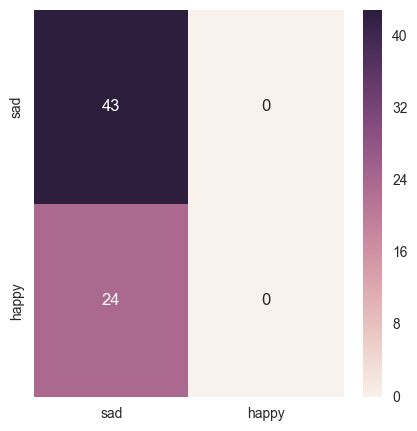

In [82]:
prediction_evaluation("SVM",classifier_rbf,X_test,y_test)

In [85]:
len(y_test[y_test==1])/(len(y_test))

0.3582089552238806

### Build Naive Bayes Model

In [87]:
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

             precision    recall  f1-score   support

        sad       0.64      1.00      0.78        43
      happy       0.00      0.00      0.00        24

avg / total       0.41      0.64      0.50        67

#### MultinomialNB accuracy =  64.2%


C:\Users\10465\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


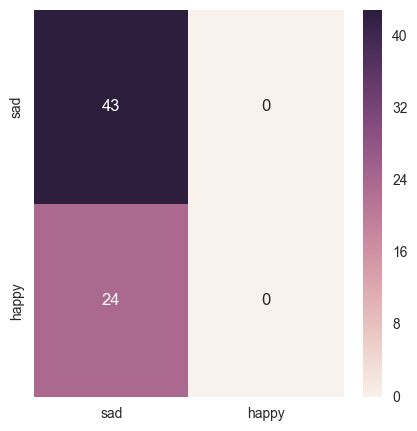

In [88]:
prediction_evaluation("MultinomialNB",clf_NB,X_test,y_test)

## key words chang through time

In [10]:
set(df["year"])

{0,
 1956,
 1960,
 1962,
 1963,
 1964,
 1969,
 1972,
 1975,
 1977,
 1980,
 1981,
 1983,
 1984,
 1985,
 1986,
 1987,
 1990,
 1991,
 1992,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010}

In [35]:
lyrics_50s = ""
lyrics_60s = ""
lyrics_70s = ""
lyrics_80s = ""
lyrics_90s = ""
lyrics_00s = ""
for row_id in df.index:
    if df.loc[row_id]['year']>=1950 and df.loc[row_id]['year']<1960:
        lyrics_50s = lyrics_50s+" "+df.loc[row_id]['lyrics']
    if df.loc[row_id]['year']>=1960 and df.loc[row_id]['year']<1970:
        lyrics_60s = lyrics_60s+" "+df.loc[row_id]['lyrics']
    if df.loc[row_id]['year']>=1970 and df.loc[row_id]['year']<1980:
        lyrics_70s = lyrics_70s+" "+df.loc[row_id]['lyrics']
    if df.loc[row_id]['year']>=1980 and df.loc[row_id]['year']<1990:
        lyrics_80s = lyrics_80s+" "+df.loc[row_id]['lyrics']
    if df.loc[row_id]['year']>=1990 and df.loc[row_id]['year']<2000:
        lyrics_90s = lyrics_90s+" "+df.loc[row_id]['lyrics']
    if df.loc[row_id]['year']>=2000 and df.loc[row_id]['year']<2011:
        lyrics_00s = lyrics_00s+" "+df.loc[row_id]['lyrics']
    

print(lyrics_50s)

In [37]:
print(lyrics_50s)

 I put a spell on you 
Because you're mine 
Stop the things you do 
Watch out, I ain't lying 

I can't stand 
No running around 
I can't stand
No putting me down 

I put a spell on you 
Because you're mine, oh yeah

Stop the things you do 
Watch out, I ain't lying 

Oh, oh, I love you, I love you 
I love you anyhow 
I don't care if you don't want me 
I'm yours right now 

I put a spell on you 
Because you're mine, mine, mine 
Oh, ooh you're mine


In [39]:
text_file = open("SongLyrics_50.txt", "w")
text_file.write(lyrics_50s)
text_file.close()

In [40]:
text_file = open("SongLyrics_60.txt", "w")
text_file.write(lyrics_60s)
text_file.close()

In [41]:
text_file = open("SongLyrics_70.txt", "w")
text_file.write(lyrics_70s)
text_file.close()

In [42]:
text_file = open("SongLyrics_80.txt", "w")
text_file.write(lyrics_80s)
text_file.close()

In [43]:
text_file = open("SongLyrics_90.txt", "w")
text_file.write(lyrics_90s)
text_file.close()

In [44]:
text_file = open("SongLyrics_00.txt", "w")
text_file.write(lyrics_00s)
text_file.close()

## Most frequent words from 50s to 00s

50s:   oh; you're; love; spell; ain't

60s:   baby; want; come; time; let

70s:   come; got; little; i'm; baby

80s:   groove; come; fascist; thang; brothers

90s:   i'm; na; love; know; it's

00s:   i'm; just; it's; got; know